<a href="https://colab.research.google.com/github/ksi81/HW_9K-means-and-elbow-method/blob/main/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os
zip_path = 'data.zip'
extract_path = '/mnt/data/unpacked_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['data']

In [3]:
# Перелік файлів
os.listdir(f'{extract_path}/data')

['mnist.csv', 'data_2d.csv']

Подивимось що в середні.

In [28]:
import pandas as pd

data_2d = pd.read_csv(f'{extract_path}/data/data_2d.csv')
mnist = pd.read_csv(f'{extract_path}/data/mnist.csv')
# перші рядки
data_2d.head(), mnist.head()

(   0.000000000000000000e+00  -7.687164597386728637e-01  \
 0                       0.0                   2.687848   
 1                       0.0                  -0.201379   
 2                       0.0                   0.608496   
 3                       0.0                  -0.082282   
 4                       0.0                   2.083069   
 
    4.608603078297135447e-01  
 0                  2.366961  
 1                  0.470430  
 2                  1.225400  
 3                  1.137218  
 4                  2.694482  ,
    7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
 0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
 4  1  0    0    0    0    0    0    0    0    0  ...      0      0

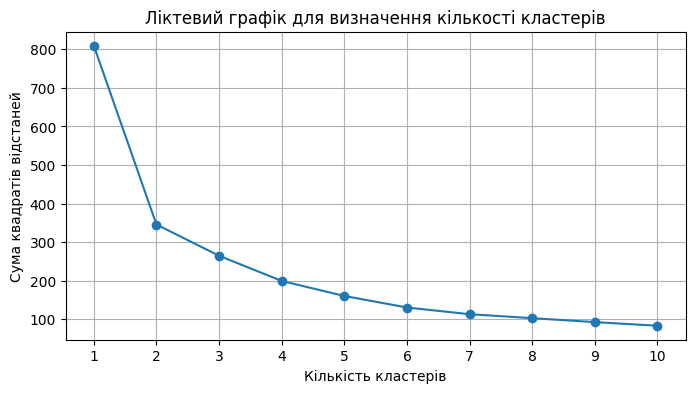

In [44]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Видаляємо зайву першу колонку з data_2d
data_2d_cleaned = data_2d.iloc[:, 1:3]

# Визначення кількості кластерів за допомогою ліктевого методу
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=k, random_state=0).fit(data_2d_cleaned)
    inertia.append(kmeans.inertia_)

# Візуалізація ліктевого графіку
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Ліктевий графік для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів відстаней')
plt.xticks(k_range)
plt.grid(True)
plt.show()


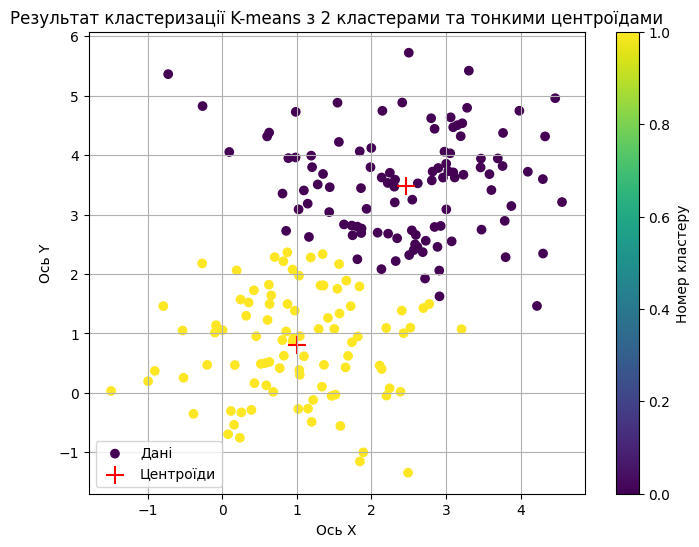

In [52]:
# Застосування K-means з двома кластерами
kmeans = KMeans(n_clusters=2,n_init=k, random_state=0).fit(data_2d_cleaned)
labels = kmeans.labels_

# Центроїди
centroids = kmeans.cluster_centers_

# Візуалізація
plt.figure(figsize=(8, 6))
plt.scatter(data_2d_cleaned.iloc[:, 0], data_2d_cleaned.iloc[:, 1], c=labels, cmap='viridis', marker='o', label='Дані')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, label='Центроїди', marker='+')
plt.title('Результат кластеризації K-means з 2 кластерами та тонкими центроїдами')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.colorbar(label='Номер кластеру')
plt.legend()
plt.grid(True)
plt.show()

На основі аналізу даних data_2d за допомогою K-means з двома кластерами можна зробити кілька висновків:

Кластеризація: Двовимірні дані ефективно розділились на два кластери, що може вказувати на наявність двох різних груп або типів даних у вашому датасеті.

Центроїди: Визначені центри кластерів допомагають відобразити 'середнє' положення кожної групи даних, що може бути корисним для розуміння основних характеристик кожного кластера.

Оптимальна кількість кластерів: Ліктевий метод показав, що після двох кластерів приріст у зменшенні внутрішньокластерної суми квадратів відстаней значно знижується, що підтверджує вибір двох кластерів як оптимального.

____________________


 Перейдемо до датасету mnist. Оскільки mnist складається з 784 пікселів (28x28) для кожного зображення і перша колонка містить мітку класу (цифра), спочатку варто видалити цю мітку перед кластеризацією. Після цього можемо застосувати K-means для кластеризації, використовуючи метод ліктя для визначення оптимальної кількості кластерів.

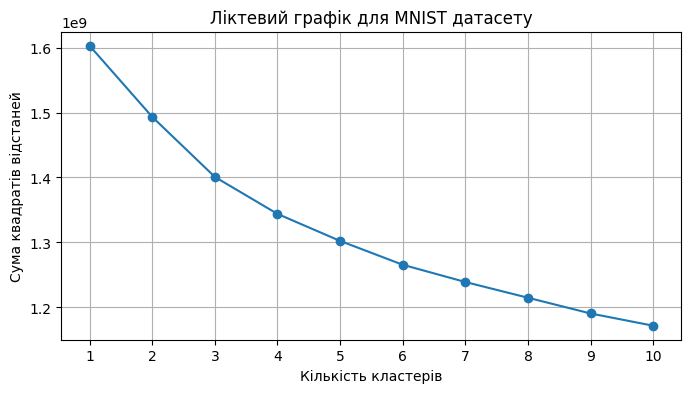

In [54]:
# Видалення першої колонки з мітками класів з mnist
mnist_data = mnist.drop(mnist.columns[0], axis=1)

# Визначення кількості кластерів за допомогою ліктевого методу для mnist
mnist_inertia = []
mnist_k_range = range(1, 11)
for k in mnist_k_range:
    kmeans_mnist = KMeans(n_clusters=k,n_init=k, random_state=0).fit(mnist_data)
    mnist_inertia.append(kmeans_mnist.inertia_)

# Візуалізація
plt.figure(figsize=(8, 4))
plt.plot(mnist_k_range, mnist_inertia, marker='o')
plt.title('Ліктевий графік для MNIST датасету')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів відстаней')
plt.xticks(mnist_k_range)
plt.grid(True)
plt.show()

На мою Думку треба брати 3 кластера. Але по завбланню треба тільки 2.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


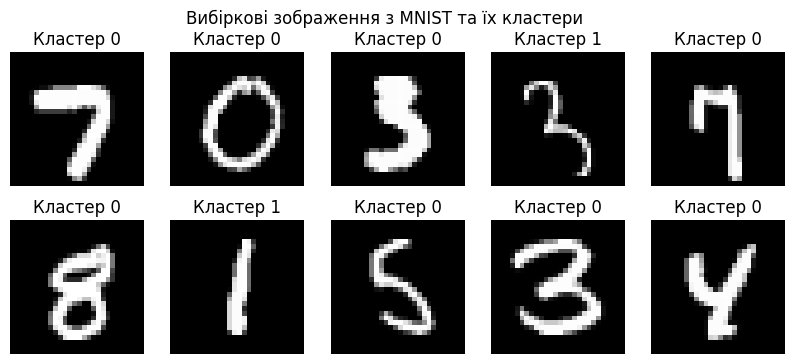

In [55]:
# Застосування K-means з двома кластерами для датасету mnist
kmeans_mnist_2 = KMeans(n_clusters=2, random_state=0).fit(mnist_data)
mnist_labels_2 = kmeans_mnist_2.labels_

# Оскільки mnist є датасетом зображень, візуалізувати весь датасет важко,
# тому ми можемо візуалізувати декілька вибіркових зображень та їх приналежність до кластерів

# Вибірка зображень для візуалізації
samples = np.random.choice(mnist_data.index, 10)

# Підготовка візуалізації
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle('Вибіркові зображення з MNIST та їх кластери')

for i, ax in enumerate(axs.flatten()):
    # Візуалізація зображення цифр
    image = mnist_data.loc[samples[i]].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.title.set_text(f'Кластер {mnist_labels_2[samples[i]]}')
    ax.axis('off')

plt.show()

На візуалізації  видно  вибіркові зображення з датасету mnist, кожне з яких віднесено до одного з двох кластерів. Зображення позначено номером кластера, до якого воно належить.

Кластеризація з використанням лише двох кластерів може не повністю відображати різноманітність зображень рукописних цифр, які включають 10 різних класів (0-9). Така модель може групувати зображення на основі деяких базових особливостей, наприклад, кількості пікселів, які формують цифри, але не за їх семантичним значенням як цифри.

Візуалізація кластеризації багатовимірних даних, як-от mnist, що містять 784 виміри (для кожного пікселя зображення), безпосередньо не можлива у двовимірному просторі.

Шоб перетворити дані у двовимірний або тривимірний простір для візуалізації ми використаємо метод  зменшення розмірності, - PCA (Principal Component Analysis)

Спробуємо використати PCA для зменшення розмірності mnist даних до двох вимірів, застосуємо K-means для кластеризації з 3 кластерами і візуалізуємо результати разом із центроїдами. Це допоможе нам краще зрозуміти розподіл даних після кластеризації.

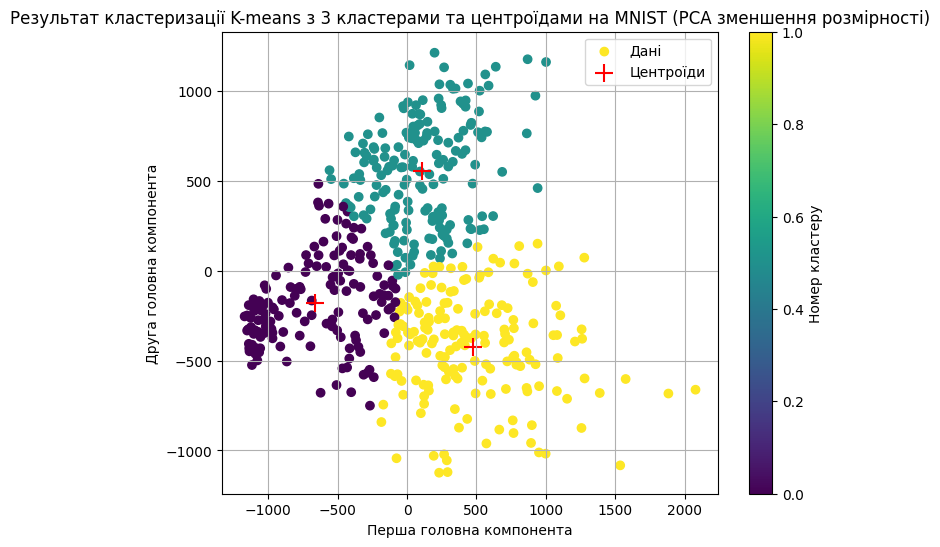

In [64]:
from sklearn.decomposition import PCA

# Застосування PCA для зменшення розмірності до 2
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_data)

# Застосування K-means з трьома кластерами
kmeans_mnist_3 = KMeans(n_clusters=3,n_init=k, random_state=0).fit(mnist_pca)
mnist_labels_3 = kmeans_mnist_3.labels_
mnist_centroids_3 = kmeans_mnist_3.cluster_centers_

# Візуалізація
plt.figure(figsize=(8, 6))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_labels_3, cmap='viridis', marker='o', label='Дані')
plt.scatter(mnist_centroids_3[:, 0], mnist_centroids_3[:, 1], c='red', s=150, label='Центроїди', marker='+')
plt.title('Результат кластеризації K-means з 3 кластерами та центроїдами на MNIST (PCA зменшення розмірності)')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.colorbar(label='Номер кластеру')
plt.legend()
plt.grid(True)
plt.show()

На мою  думку три кластера ідеально  показують ситуацію розподілення даних.

Результати кластеризації датасету mnist у двовимірному просторі, отриманому за допомогою PCA.
Використання трьох кластерів дозволило групувати дані з урахуванням їхнього розподілу в цьому зменшеному просторі.



Але  по завданню треба зробити 2 кластери


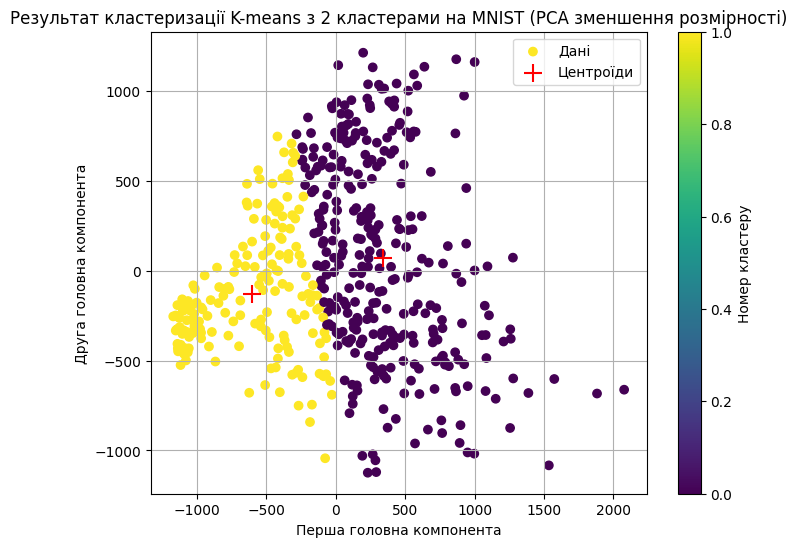

In [65]:
# Застосування K-means з двома кластерами на даних після PCA
kmeans_mnist_2_pca = KMeans(n_clusters=2, n_init=k, random_state=0).fit(mnist_pca)
mnist_labels_2_pca = kmeans_mnist_2_pca.labels_
mnist_centroids_2_pca = kmeans_mnist_2_pca.cluster_centers_

# Візуалізація
plt.figure(figsize=(8, 6))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_labels_2_pca, cmap='viridis', marker='o', label='Дані')
plt.scatter(mnist_centroids_2_pca[:, 0], mnist_centroids_2_pca[:, 1], c='red', s=150, label='Центроїди', marker='+')
plt.title('Результат кластеризації K-means з 2 кластерами на MNIST (PCA зменшення розмірності)')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.colorbar(label='Номер кластеру')
plt.legend()
plt.grid(True)
plt.show()

На основі кластеризації датасету mnist з використанням PCA для зменшення розмірності та K-means з двома кластерами, можна зробити кілька висновків:

Зменшення розмірності: Використання PCA дозволяє візуалізувати високовимірні дані у двовимірному просторі, показуючи як дані можуть бути узагальнені.
Це дає змогу оцінити загальні шаблони і структуру даних.

Розподіл кластерів: Візуалізація показує, як дані групуються у двох кластерах. Кожен кластер збирає зразки з різних класів цифр, але можливо вони мають певні спільні візуальні характеристики, що не завжди відповідають числовим значенням цифр.

Центроїди: Позначення центроїдів вказує на 'середні' точки кластерів у зменшеному просторі, що може допомогти зрозуміти, які характеристики даних сприяють їхньому групуванню.

Обмеження моделі: Кластеризація з обмеженим числом кластерів (як у цьому випадку з двома) може не відображати всю складність та варіативність mnist датасету, оскільки він містить 10 класів цифр.

Такий підхід може призвести до перекриття декількох класів в одному кластері, знижуючи здатність кластеризації диференціювати між різними цифрами.
